## Обработка пропусков, кодирование категориальных признаков и масштабирование данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#### Обзор данных

In [2]:
data = pd.read_csv('aug_train.csv')
data.shape

(19158, 14)

In [3]:
pd.concat({'Object type':data.dtypes, 'Null count':data.isnull().sum()}, axis=1)

,Object type,Null count
enrollee_id,int64,0
city,object,0
city_development_index,float64,0
gender,object,4508
relevent_experience,object,0
enrolled_university,object,386
education_level,object,460
major_discipline,object,2813
experience,object,65
company_size,object,5938


In [65]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Берем колонку 'enrolled_university' для заполнения пустых ячеек

In [66]:
data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [67]:
# количество для каждого значения столба без учета null
nonNullValues = data['enrolled_university'].value_counts(ascending=False)
# количество null
nullValues = pd.Series({'nan': data['enrolled_university'].isnull().sum()})

pd.concat([nonNullValues, nullValues], axis=0)

no_enrollment       13817
Full time course     3757
Part time course     1198
nan                   386
dtype: int64

#### Заполняем пропуски наиболее популярным значением

In [68]:
# создаем импьютор
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
filledColumn = imp.fit_transform(data[['enrolled_university']])
filledColumn

array([['no_enrollment'],
       ['no_enrollment'],
       ['Full time course'],
       ...,
       ['no_enrollment'],
       ['no_enrollment'],
       ['no_enrollment']], dtype=object)

In [69]:
np.unique(filledColumn)

array(['Full time course', 'Part time course', 'no_enrollment'],
      dtype=object)

In [70]:
# ndarray to Series
filledColumnSeries = pd.Series(map(lambda x: x[0], filledColumn))
filledColumnSeries

0           no_enrollment
1           no_enrollment
2        Full time course
3           no_enrollment
4           no_enrollment
               ...       
19153       no_enrollment
19154       no_enrollment
19155       no_enrollment
19156       no_enrollment
19157       no_enrollment
Length: 19158, dtype: object

In [71]:
# check if 'no_enrollment' number increases
filledColumnSeries.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [73]:
data['enrolled_university'] = filledColumnSeries
data['enrolled_university'].isnull().sum()

0

#### Кодирование категориального признака

In [3]:
edu_level = pd.DataFrame(data['education_level'])
edu_level.head()

,education_level
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,Masters


In [5]:
edu_level['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
filledColumn = imp.fit_transform(edu_level)
np.unique(filledColumn)

array(['Graduate', 'High School', 'Masters', 'NA', 'Phd',
       'Primary School'], dtype=object)

In [18]:
edu_level['education_level'] = pd.Series(pd.Series(map(lambda x: x[0], filledColumn)))
print(edu_level.head(), edu_level['education_level'].unique(), sep='\n')

  education_level
0        Graduate
1        Graduate
2        Graduate
3        Graduate
4         Masters
['Graduate' 'Masters' 'High School' 'NA' 'Phd' 'Primary School']


In [19]:
d = {'NA': 0, 'Primary School': 1, 'High School': 2, 'Graduate': 3, 'Masters': 4, 'Phd': 5}
edu_level['coded'] = edu_level['education_level'].map(d)
edu_level.head(10)

,education_level,coded
0,Graduate,3
1,Graduate,3
2,Graduate,3
3,Graduate,3
4,Masters,4
5,Graduate,3
6,High School,2
7,Graduate,3
8,Graduate,3
9,Graduate,3


#### Масштабирование данных (другой датасет)

In [3]:
cars = pd.read_csv('used_cars_data.csv')
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
cars.shape

(7253, 14)

In [21]:
# Удаляем записи, где пробег сильно больше большинства
cars = cars[cars.Kilometers_Driven <= 300000]
cars.shape

(7245, 14)

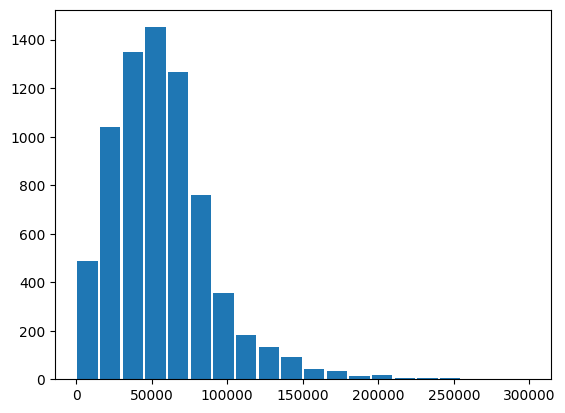

In [24]:
plt.hist(cars['Kilometers_Driven'], rwidth=0.9, bins=20)
plt.show()

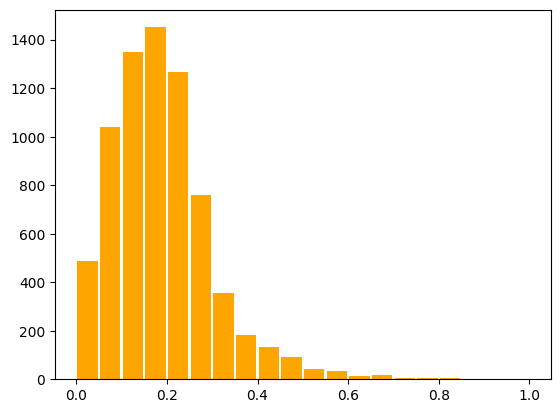

In [27]:
scaler = MinMaxScaler()
scaledKilometersDriven = scaler.fit_transform(cars[['Kilometers_Driven']])

plt.hist(scaledKilometersDriven, rwidth=0.9, bins=20, color='orange')
plt.show()